# abacus simulations
testing I/O for the abacus simulations on NERSC

In [1]:
import numpy as np
from abacusnbody.data.compaso_halo_catalog import CompaSOHaloCatalog

In [2]:
CompaSOHaloCatalog?

Init signature:
CompaSOHaloCatalog(
    path,
    load_subsamples=False,
    convert_units=True,
    unpack_bits=False,
    fields='all',
    verbose=False,
)
Docstring:      A halo catalog from Abacus's on-the-fly group finder.
Init docstring:
Loads halos.  The ``halos`` field of this object will contain
the halo records; and the ``subsamples`` field will contain
the corresponding halo/field subsample positions and velocities and their
ids (if requested via ``load_subsamples``).  The ``header`` field contains
metadata about the simulation.

Whether a particle is tagged or not is returned when loading the
halo and field pids, as it is encoded for each in the 64-bit PID.
The local density of the particle is also encoded in the PIDs 
and returned upon loading those.

Parameters
----------
path: str or list of str
    The directory containing the halo files, like ``MySimulation/halos/z1.000``.
    Or a halo info file, or a list of halo info files.

load_subsamples: bool or str, optional
 

In [3]:
cat = CompaSOHaloCatalog("/global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_hugebase_c000_ph000/halos/z0.100/halo_info/halo_info_000.asdf", load_subsamples='A_halo_all')

In [4]:
M_particle = cat.header['ParticleMassHMsun'] # Msun/h
print('particle mass = %.2e Msun/h' % M_particle)

particle mass = 5.69e+10 Msun/h


In [5]:
halo_pos = cat.halos['SO_central_particle'] # halo position set to central particle position
halo_mass = cat.halos['N'] * M_particle

In [6]:
i_halo = np.random.choice(np.where((halo_mass > 1e14) & (halo_mass < 2e14))[0], size=1)[0]

In [7]:
halo = cat.halos[i_halo]

In [10]:
particle_pos = cat.subsamples['pos'][halo['npstartA']:halo['npstartA'] + halo['npoutA']]

In [11]:
particle_cpos = particle_pos - halo_pos[i_halo] # cluster centric position

In [9]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


(-1.0, 1.0)

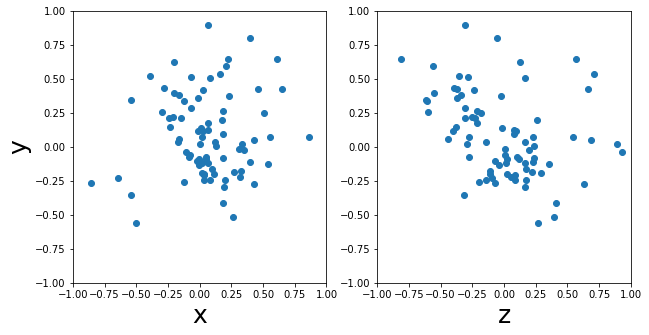

In [14]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(121)
sub.scatter(particle_cpos[:,0], particle_cpos[:,1])
sub.set_xlabel('x', fontsize=25)
sub.set_xlim(-1., 1)
sub.set_ylabel('y', fontsize=25)
sub.set_ylim(-1., 1)

sub = fig.add_subplot(122)
sub.scatter(particle_cpos[:,2], particle_cpos[:,1])
sub.set_xlabel('z', fontsize=25)
sub.set_xlim(-1., 1)
sub.set_ylim(-1., 1)